# Virtual Pruning

## Importing the digitized structure

In [27]:
from openalea.mtg import *
import numpy as np
from importlib import reload
import mangoG3; reload(mangoG3)
from mangoG3 import *

g = get_G3_mtg()


In [28]:
from matplotlib.pyplot import *
import mtgplot as mp

In [29]:
sw = mp.plot_tree(g)
sw

SceneWidget(scenes=[{'id': 'UITdwEELktJNW3zXpl0mVbohS', 'data': b'x\xda\xa4}\t|T\xd5\xf5\xff\xb0\x04p\xd8\x04\…

## Vegative growth after pruning

In [30]:
import pruning ; reload(pruning)
from pruning import *

In [35]:
pruned = prune(g, 190)

In [36]:
intensity = continuous_intensity_from_pruned(pruned)
print(intensity, intensity_level(intensity))

0.5873106783518035 T3


In [37]:
prunedrepr = mp.representation(pruned, wood = False, leaves=True)

In [38]:
import lightestimation; reload(lightestimation)
from lightestimation import *

In [39]:
TrPPFD_min, Zeta_min, Zeta_12H = light_variables(prunedrepr)

<AxesSubplot:>

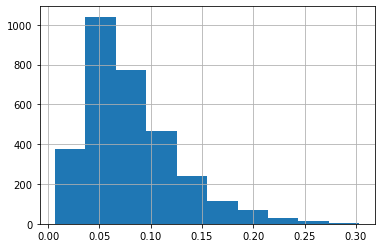

In [24]:
TrPPFD_min.hist()

<AxesSubplot:>

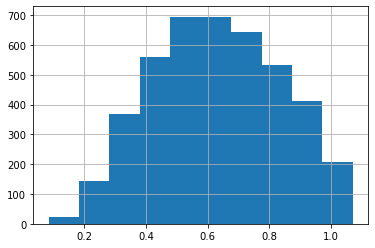

In [34]:
Zeta_min.hist()

In [36]:
mp.plot_projection(prunedrepr, Zeta_12H)   

SceneWidget(scenes=[{'id': '4OPkRNsf02IBe7pySEsUeBybp', 'data': b'x\xda\x8c\x9d\x07\\\x13I\xfb\xc7\xb1wE\x05{\…

In [40]:
import regrowth_base; reload(regrowth_base)
from regrowth_base import plot_growth
import regrowth_emma; reload(regrowth_emma)
from regrowth_emma import *

In [41]:
regrowth, newids = growth(pruned, TrPPFD_min, Zeta_min, Zeta_12H)

print('Created', len(newids), 'new GUs')
plot_growth(regrowth, leaves=True, gc=True)

Should examine 2434 terminal GUs.
Processed 570 pruned terminal GU and 1833 unpruned terminal GU and  31 ignored.
Created 6957 new GUs


SceneWidget(scenes=[{'id': '1ChovVkZz2WURgHddHnsGJWUJ', 'data': b'x\xda\xc4\xbd\x07|\xd5\xc6\xd2>l\xba\xe9\xbd…

In [42]:
def date_histo(g):
    from matplotlib.pyplot import hist, show
    from collections import Counter
    from datetime import timedelta
    c = list(Counter(g.property('BurstDate').values()).items())
    c.sort(key = lambda v : v[0])
    mindate = c[0][0]
    maxdate = c[-1][0]
    c = dict(c)
    r = range(0,(maxdate-mindate).days)
    d = [mindate+timedelta(days=d) for d in r]
    v = [ c.get(di,0) for di in d]
    bar(r,v)
    xticks(r,d, rotation=90)
    show()

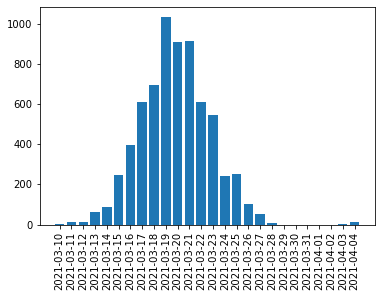

In [43]:
date_histo(regrowth)

In [44]:
plot_growth_dynamic(regrowth)

2021-03-10 --- 2021-04-05


D:\V_mango\virtualpruning\notebooks\mtgplot.py:255: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if burstdate and burstdate > todate: return


SceneWidget(scenes=[{'id': 'FinIzlo0v0vX9N7p9NbLb0oT1', 'data': b'x\xda\x94\x9d\x05`\x15\xc7\xd6\xc7\x83\xbb\x…

interactive(children=(IntSlider(value=26, description='x', max=26), Button(description='Run Interact', style=B…

<function regrowth_base.plot_growth_dynamic.<locals>.plot_dyn(x)>

In [17]:
def nb_children_histo(g):
    def severity(vid):
        return g.property('cuted').get(vid,0)

    ancestors = [get_parent(g,vid) if vid in g.property('BurstDate') else vid for vid in get_all_terminal_gus(g) ]
    ancestors = set(ancestors)
    
    values = [[] for i in range(4)]
    for vid in ancestors:
        values[severity(vid)].append(g.nb_children(vid))
    figure(figsize=(18,4))
    for order, v in enumerate(values):
        if len(v) > 0:
            subplot(220+order+1)
            hist(v, bins=np.arange(0,max(1,max(v)))-0.5)
            print(len(v),(np.mean(v), np.std(v)),(np.mean([vi for vi in v if vi > 0]), np.std([vi for vi in v if vi > 0])),(np.min(v), np.max(v)))
    show()
    

2779 (1.2151853184598778, 1.813479493453885) (2.673792557403009, 1.8265228429135258) (0, 11)


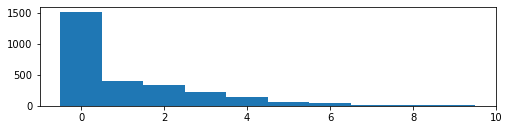

In [18]:
nb_children_histo(regrowth)

In [19]:
import gapfraction ; reload(gapfraction)
from gapfraction import gapfraction_dynamic

In [48]:
gft = gapfraction_dynamic(regrowth) 

In [49]:
pruningdate = date(2021,2,24)

In [50]:
import gapfraction; reload(gapfraction)
from gapfraction import *

gf0 = gap_fraction(g, camheight=150)
print(gf0)

0.08657181959960533


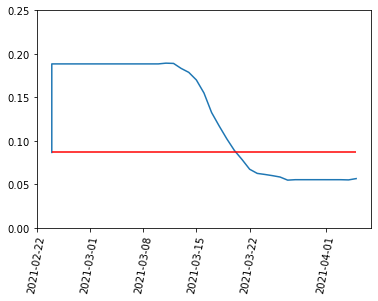

In [51]:
from matplotlib.pyplot import *
plot([pruningdate,pruningdate]+[d for d,g in gft],[gf0,gft[0][1]]+[g for d,g in gft])
hlines(gf0,pruningdate,gft[-1][0],color='r')
ylim(0,0.25)
xticks(rotation = 80)
show()

In [52]:
my_array = [pruningdate,pruningdate]+[d for d,g in gft],[gf0,gft[0][1]]+[g for d,g in gft]

In [53]:
import csv
import pandas as pd 

df = pd.DataFrame(my_array) 

df.to_csv('simulation_T3.csv') 

In [ ]:
## STOP - Ajouter les relations de séverine

In [32]:
# Leaf area produced + leaf area removed at the tree scale
def leaf_area_produced(mtg,newids):
    newids = growth(t3, listidprunedT3, T3)
    totalleafarea = sum([individual_leafarea_unpruned() for vid in newids])
    growth(t3, listidprunedT3, T3)
    return totalleafarea

In [42]:
def simulation(mtg, nbcuts):
    from allometry import gu_leaf_area
    # characterize before pruning
    # nb of terminal units
    nbterminalunits = len(get_all_terminal_gus(mtg))

    # determine pruning
    listidpruned = define_pruning(mtg, nbcuts, None)
    #pruningprop = tag_pruning(mtg, listidpruned)

    # characterize pruning
    # - intensity
    intensity = intensity_level(continuous_intensity(g,listidpruned))
    #if intensity == T2:
    #    raise ValueError('Intensity', intensity)
        
    #  - nb of terminal units
    nbremovedGU = sum([sum([len(get_descendants_gus_from_ancestor(mtg, vid))-1 for vid in pruneds]) for order, pruneds in listidpruned.items()])
    
    # - surface foliaire retire 
    removed_leaf_area = sum([sum([gu_leaf_area(get_gu_diameter(mtg, vid)) for vid in pruneds]) for order, pruneds in listidpruned.items()])
    
    # apply pruning
    prunedmtg = apply_pruning(mtg, listidpruned)
    
    prunedrepr = mp.representation(pruned, wood = False, leaves=True)
    TrPPFD_min, Zeta_min, Zeta_12H = light_variables(prunedrepr)

    # characterize pruning
    # nb of terminal units
    
    # apply growth    
    growthmtg, newGUs = growth(prunedmtg, TrPPFD_min, Zeta_min, Zeta_12H)

    allpruned = pruned

    # characterize growth
    nbgeneratedGU = len(newGUs)
    generated_leaf_area_pruned = sum([la for vid,la in growthmtg.property('RegeneratedLeafArea').items() if vid in allpruned])
    generated_leaf_area_unpruned = sum([la for vid,la in growthmtg.property('RegeneratedLeafArea').items() if not (vid in allpruned)])
    
    return (nbterminalunits, nbremovedGU, nbgeneratedGU), (removed_leaf_area, generated_leaf_area_pruned, generated_leaf_area_unpruned)
    

In [43]:
units0, la0 = simulation(g, 0)
print(units0, la0)

Should examine 3228 terminal GUs.
Processed 0 pruned terminal GU and 3187 unpruned terminal GU and  41 ignored.
(3228, 0, 813) (0, 2298.893514908979, 28.722221652452262)


In [44]:
units20, la20 = simulation(g, 20)
print(units20, la20)

Should examine 3132 terminal GUs.
Processed 60 pruned terminal GU and 3031 unpruned terminal GU and  41 ignored.
(3228, 251, 1151) (658.9394325172887, 2971.8808430798376, 47.34423363147957)


In [45]:
units60, la60 = simulation(g, 60)
print(units60, la60)

Should examine 2945 terminal GUs.
Processed 180 pruned terminal GU and 2728 unpruned terminal GU and  37 ignored.
(3228, 715, 1891) (1971.6391470866624, 4709.198169813974, 120.65501127908472)


In [46]:
print(la0[1]-la0[0])
print(la20[1]-la20[0])
print(la60[1]-la60[0])

2298.893514908979
2312.941410562549
2737.559022727312


In [47]:
def process_range(mtg, cutrange = (0,20), cuttype = (1,1,1), nbtests = 1):
    if type(cutrange) == int:
        cutrange = (0, cutrange)
    import numpy as np
    gla = []
    gunits = [] 
    cuts = []
    for c in range(*cutrange):
        for i in range(nbtests):
            print('process',c,'-',i)
            try:
                units, la = simulation(mtg, [c*i for i in cuttype])
            except ValueError as e:
                print(e)
                continue
            gla.append(la)
            gunits.append(units)
            cuts.append(c)
    gla = np.array(gla)
    gunits = np.array(gunits)
    return cuts, gla, gunits
    

In [48]:
cuts76, las76, units76 = process_range(g,(0,180,5), nbtests = 1)

process 0 - 0
Should examine 3228 terminal GUs.
Processed 0 pruned terminal GU and 3187 unpruned terminal GU and  41 ignored.
process 5 - 0
Should examine 3213 terminal GUs.
Processed 15 pruned terminal GU and 3157 unpruned terminal GU and  41 ignored.
process 10 - 0
Should examine 3183 terminal GUs.
Processed 30 pruned terminal GU and 3112 unpruned terminal GU and  41 ignored.
process 15 - 0
Should examine 3173 terminal GUs.
Processed 45 pruned terminal GU and 3088 unpruned terminal GU and  40 ignored.
process 20 - 0
Should examine 3127 terminal GUs.
Processed 60 pruned terminal GU and 3026 unpruned terminal GU and  41 ignored.
process 25 - 0
Should examine 3111 terminal GUs.
Processed 75 pruned terminal GU and 2998 unpruned terminal GU and  38 ignored.
process 30 - 0
Should examine 3096 terminal GUs.
Processed 90 pruned terminal GU and 2968 unpruned terminal GU and  38 ignored.
process 35 - 0
Should examine 3073 terminal GUs.
Processed 105 pruned terminal GU and 2930 unpruned termina

In [49]:
def plot_cutrange(cuts, las, units):
    figure(figsize=(12,6))
    #subplot(121)
    normalproduction = np.mean(las[np.where(np.isin(cuts,[0]))[0],2])
    plot(cuts,las[:,0],'.',label='removed leaf area')
    plot(cuts,las[:,1],'.',label='generated leaf area from pruned GU')
    plot(cuts,las[:,2],'.',label='generated leaf area from unpruned GU')
    plot(cuts,las[:,1]+las[:,2],'.',label='generated leaf area')
    plot(cuts,(las[:,1]+las[:,2])-(las[:,0]+normalproduction),'.',label='increase of leaf area (compared to To)')
    legend()
    show()
    figure(figsize=(12,6))
    #subplot(122)
    plot(cuts,units[:,0],'.',label='nb terminal units')
    plot(cuts,units[:,1],'.',label='nb removed GU')
    plot(cuts,units[:,2],'.',label='nb generated GU')
    legend()
    show()

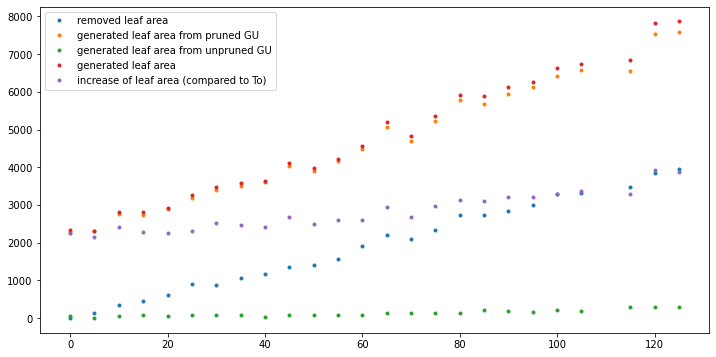

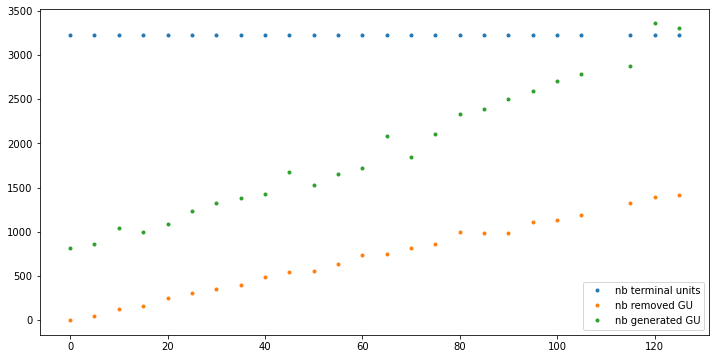

In [50]:
plot_cutrange(cuts76, las76, units76)

In [48]:
cuts, las, units = process_range(g,(0,300,5), cuttype = (1,0,0), nbtests = 1)

process 0 - 0
Should examine 3228 terminal GUs.
Processed 0 pruned terminal GU and 3187 unpruned terminal GU and  41 ignored.
process 5 - 0
Should examine 3228 terminal GUs.
Processed 5 pruned terminal GU and 3182 unpruned terminal GU and  41 ignored.
process 10 - 0
Should examine 3213 terminal GUs.
Processed 10 pruned terminal GU and 3162 unpruned terminal GU and  41 ignored.
process 15 - 0
Should examine 3223 terminal GUs.
Processed 15 pruned terminal GU and 3167 unpruned terminal GU and  41 ignored.
process 20 - 0
Should examine 3221 terminal GUs.
Processed 20 pruned terminal GU and 3160 unpruned terminal GU and  41 ignored.
process 25 - 0
Should examine 3214 terminal GUs.
Processed 25 pruned terminal GU and 3148 unpruned terminal GU and  41 ignored.
process 30 - 0
Should examine 3218 terminal GUs.
Processed 30 pruned terminal GU and 3148 unpruned terminal GU and  40 ignored.
process 35 - 0
Should examine 3217 terminal GUs.
Processed 35 pruned terminal GU and 3141 unpruned terminal 

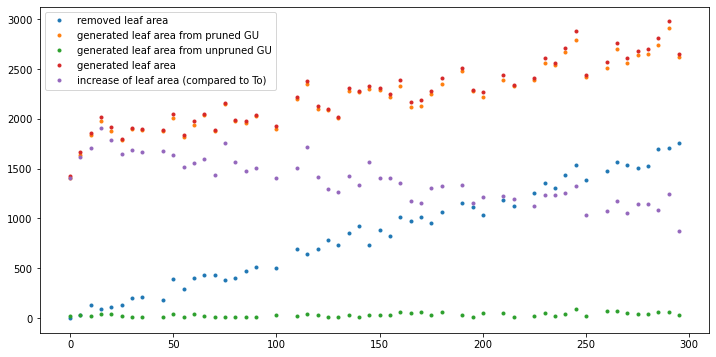

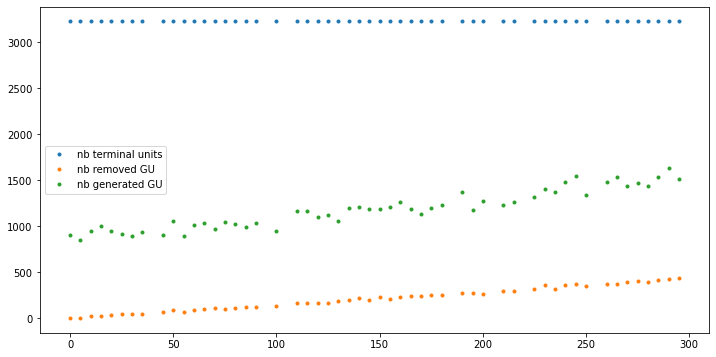

In [50]:
plot_cutrange(cuts, las, units)

In [ ]:
cuts, las, units = process_range(g,(0,300,5), cuttype = (0,1,0), nbtests = 1)

In [ ]:
plot_cutrange(cuts, las, units)

In [ ]:
cuts, las, units = process_range(g,(0,80,2), cuttype = (0,0,1), nbtests = 1)

In [ ]:
plot_cutrange(cuts, las, units)